  ## Random Forest for Loan Dataset

This is a publicly available data from [LendingClub](https://www.lendingclub.com/). This site connected borrowers and investors so that investors can see key variables that would determine the worthiness of a borrower in obtaining the loan. 

This notebook aims to classify and predict whether the borrower will pay the loan back. Let's explore this!

In [1]:
# Loading the necessary libraries for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install skimpy

In [3]:
# Importing the Dataset and start the process of preprocessing
df = pd.read_csv("loan_data.csv")

In [4]:
from skimpy import skim

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9578   │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 6     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ credit.policy      │   0 │     0 │   0.805 │  0.3962 │     0 │      1 │      1 │      1 │       1 │ ▂    ▇ │  │
│ │ int.rate           │   0 │     0 │  0.1226 │ 0.02685 │  0.06 │ 0.1039 │ 0.1221 │ 0.1407 │  0.2164 │ ▂▅▇▅▁  │  │
│ │ installment        │   0 │     0 │   319.1 │   207.1 │ 15.67 │  163.8 │  268.9 │  432.8 │   940.1 │ ▇▇▅▃▂▁ │  │
│ │ log.annual.inc     │   0 │     0 │   10.93 │  0.6148 │ 7.548 │  10.56 │  10.93 │  11.29 │   14.53 │   ▁▇▆  │  │
│ │ dti                │   0 │     0 │   12.61 │   6.884 │     0 │  7.213 │  12.66 │  17.95 │   29.96 │ ▆▇▇▇▅▁ │  │
│ │ fico               │   0 │     0 │   710.8 │   37.97 │   612 │    682 │    707 │    737 │     827 │ ▁▆▇▅▃▁ │  │
│ │ days.with.cr.line  │   0 │     0 │    4561 │    2497 │   179 │   2820 │   4140 │   5730 │   17640 │  ▅▇▃▁  │  │
│ │ revol.bal          │   0 │     0 │   16910 │   33760 │     0 │   3187 │   8596 │  18250 │ 1207000 │   ▇    │  │
│ │ revol.util         │   0 │     0 │    46.8 │   29.01 │     0 │   22.6 │   46.3 │   70.9 │     119 │ ▇▇▇▇▆  │  │
│ │ inq.last.6mths     │   0 │     0 │   1.577 │     2.2 │     0 │      0 │      1 │      2 │      33 │   ▇    │  │
│ │ delinq.2yrs        │   0 │     0 │  0.1637 │  0.5462 │     0 │      0 │      0 │      0 │      13 │   ▇    │  │
│ │ pub.rec            │   0 │     0 │ 0.06212 │  0.2621 │     0 │      0 │      0 │      0 │       5 │   ▇    │  │
│ │ not.fully.paid     │   0 │     0 │  0.1601 │  0.3667 │     0 │      0 │      0 │      0 │       1 │ ▇    ▂ │  │
│ └────────────────────┴─────┴───────┴─────────┴─────────┴───────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ purpose                   │       0 │          0 │                            1 │                     9578 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [6]:
df.info 

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082

In [7]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

We will start with data visualization, using seaborn and pandas built-in functions

In [8]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [9]:
# Exploring credit policy value counts
df['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

Text(0.5, 1.0, 'Fico Score Distribution')

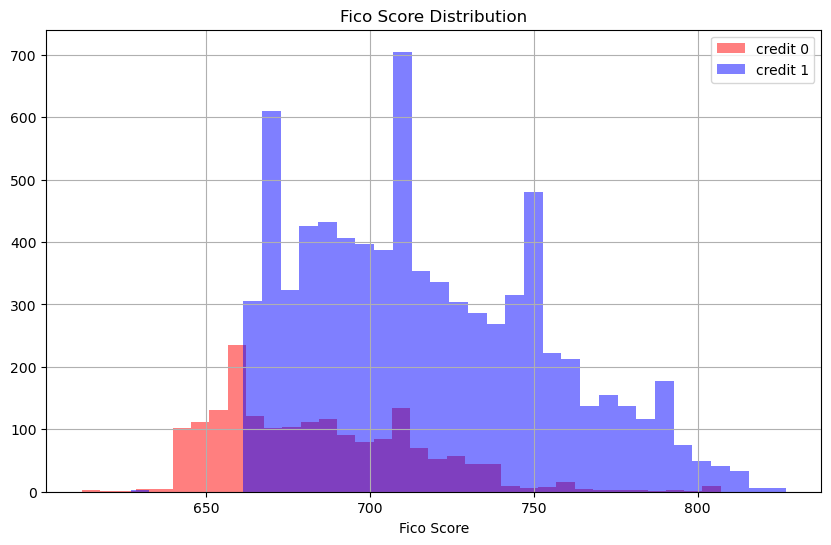

In [10]:
# Visualizing the binary outcomes that we obtained after running the value counts code
plt.figure(figsize=(10,6))
df[df['credit.policy'] == 0]['fico'].hist(bins=35, alpha=0.5, color='red', label="credit 0")
df[df['credit.policy'] == 1]['fico'].hist(bins=35, alpha=0.5, color='blue', label="credit 1")
plt.legend()
plt.xlabel("Fico Score")
plt.title("Fico Score Distribution")

From the histogram, one can see that people with credit scores higher than 670 have credit = 1, which means it is more likely to get credit if you have a credit score of 670 and above. Although, it is not always the case, it is probable that other factors account in credit decisions. 

<Axes: xlabel='purpose', ylabel='count'>

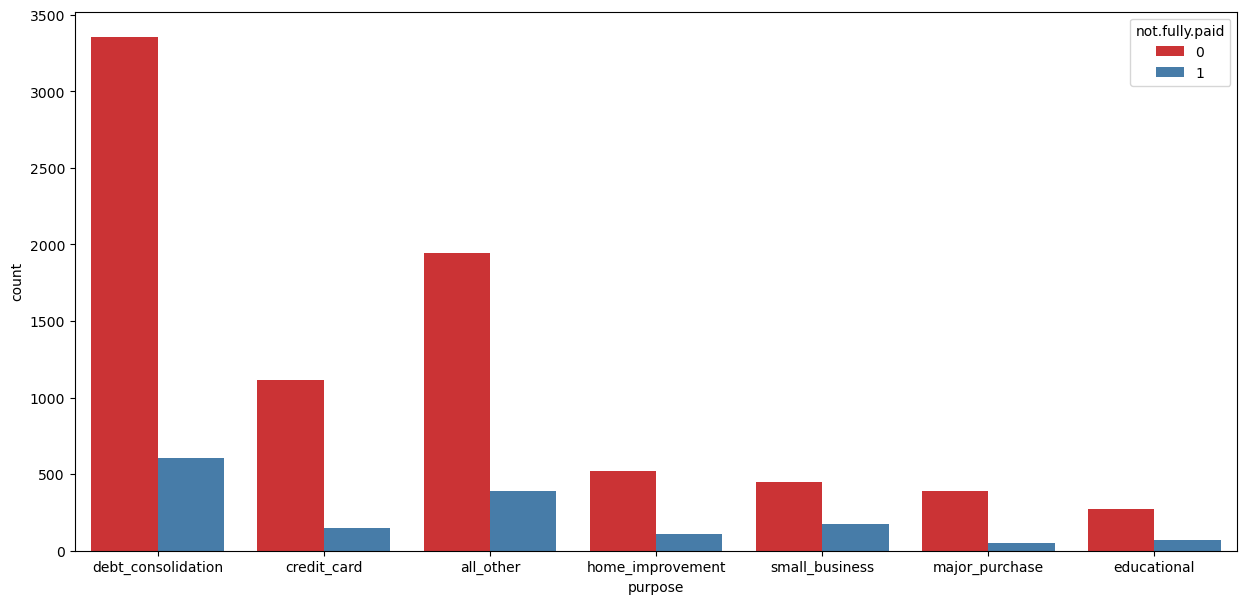

In [11]:
# Creating a countplot using seaborn showing the counts of loans
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='purpose', hue='not.fully.paid', palette='Set1')

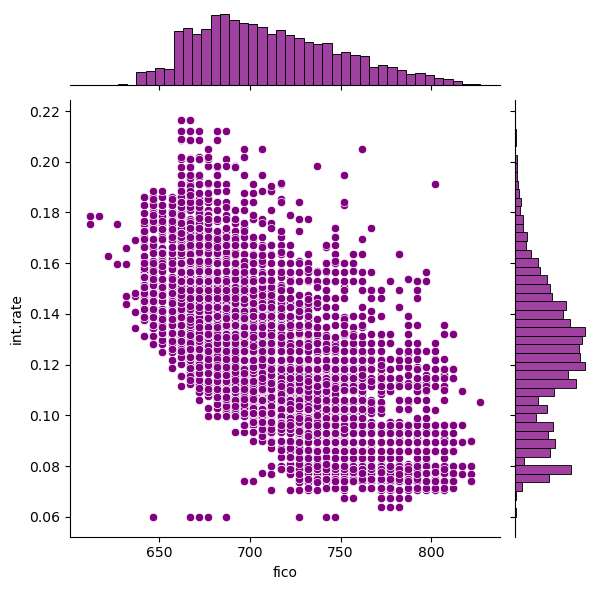

In [12]:
sns.jointplot(data=df, x='fico', y='int.rate', color='purple');

In [13]:
# Categorical features such as /*purpose column needs to change using dummy variables. 
categorical_features = ['purpose']

In [14]:
final_data = pd.get_dummies(data=df, columns=categorical_features, drop_first=True)

In [15]:
final_data = final_data.astype(int)

In [16]:
final_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
count,9578.000000,9578.0,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.0,318.604302,10.445918,12.118292,710.846314,4560.525162,1.691396e+04,46.363646,1.577469,0.163708,0.062122,0.160054,0.131760,0.413134,0.035811,0.065671,0.045625,0.064627
std,0.396245,0.0,207.082895,0.690671,6.876929,37.970537,2496.915263,3.375619e+04,28.988864,2.200245,0.546215,0.262126,0.366676,0.338248,0.492422,0.185829,0.247720,0.208682,0.245880
min,0.000000,0.0,15.000000,7.000000,0.000000,612.000000,178.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.0,163.000000,10.000000,7.000000,682.000000,2820.000000,3.187000e+03,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.0,268.000000,10.000000,12.000000,707.000000,4139.000000,8.596000e+03,46.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.0,432.000000,11.000000,17.000000,737.000000,5730.000000,1.824950e+04,70.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,940.000000,14.000000,29.000000,827.000000,17639.000000,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Train Test Split for the modeling

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = final_data.drop('not.fully.paid', axis=1)
y = final_data['not.fully.paid']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training a Decision Tree Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
d_tree = DecisionTreeClassifier()

In [22]:
d_tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predictions and Evaluations

In [23]:
pred = d_tree.predict(X_test)

In [24]:
#pip install --upgrade scikit-learn

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



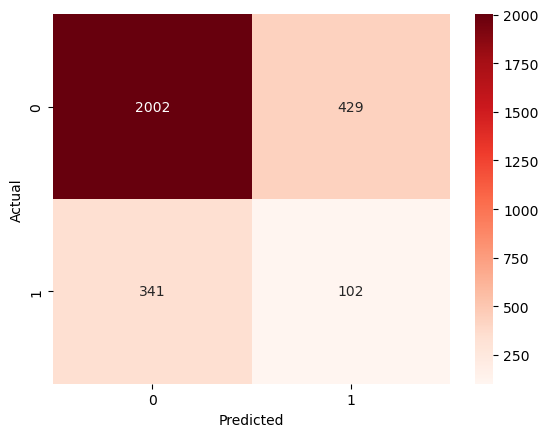

In [29]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Now, Time for Random Forests

In [ ]:
#pip install -- RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
classifier_obj = RandomForestClassifier(n_estimators=300)

In [33]:
classifier_obj.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [34]:
y_pred = classifier_obj.predict(X_test)

In [36]:
# Classification report for the random forest
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



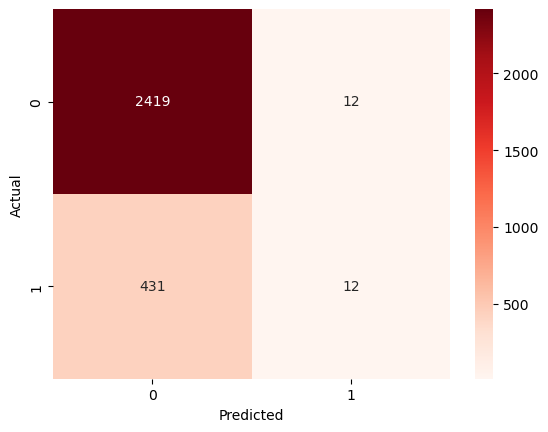

In [37]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We saw a change in the random forest as the accuracy of the predicted model increased with random forests over decision trees but the F1 and Recall score decreased. 

### Grid Search CV

In [38]:
from sklearn.model_selection import GridSearchCV

In [49]:
#help(RandomForestClassifier)

In [40]:
rf = RandomForestClassifier()

In [41]:
parameters = {
    'n_estimators': np.arange(50, 401, 50),
    'criterion' : ["gini", "entropy"],
    'max_features' : ["auto", "sqrt", "log2"],
    'n_jobs': [-1]
}

In [48]:
#help(GridSearchCV)

In [42]:
grid = GridSearchCV(rf, parameters, cv=5, verbose=1)

In [44]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Users\alira\.ms-ad\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
80 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alira\.ms-ad\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alira\.ms-ad\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\alira\.ms-ad\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\alira\.ms-ad\Lib\site-packages\sklearn\utils\

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400]),
                         'n_jobs': [-1]},
             verbose=1)

In [45]:
grid.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 200,
 'n_jobs': -1}

In [47]:
grid_y_pred = grid.predict(X_test)

In [51]:
# Classification Report of GridSearchCV
print(classification_report(y_test, grid_y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



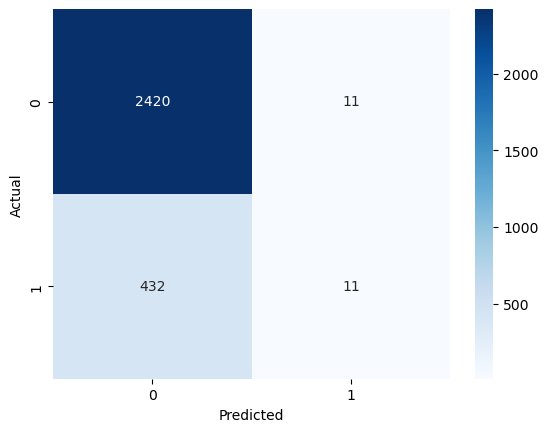

In [52]:
cm2 = confusion_matrix(y_test, grid_y_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We finalize our project here, simply sticking with Random Forest as changes brought by GridSearchCV has not changed the confusion matrix and classification report that much! The current model is 85% accurate and describes how 